In [ ]:
!pip install yfinance
import pandas as pd 
import yfinance as yf # import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
# from IPython.display import FileLink
from google.colab import files
import tqdm.notebook as tq

     |████████████████████████████████| 6.4 MB 10.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
data = yf.download('^NSEI', 
                   start='2021-01-20', 
                   end='2021-12-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# !pip install ipython-autotime
# %load_ext autotime

time: 1.03 ms (started: 2021-12-18 14:20:05 +00:00)


# HAMMER SET UP
The hammer should have no upper shadow, but can have an upper shadow if it is relatively small.

The real body should be at the top of the candlestick trading range. This real body can be bullish or bearish, but preferably bullish.

The lower shadow should be at least twice the height of the real body.

The lower shadow must be at least 2 times the height of the real body.

The trend over the past 3 trading sessions is downward.

A suggested confirmation candle closes higher than the hammer's close and an uptrend starts.

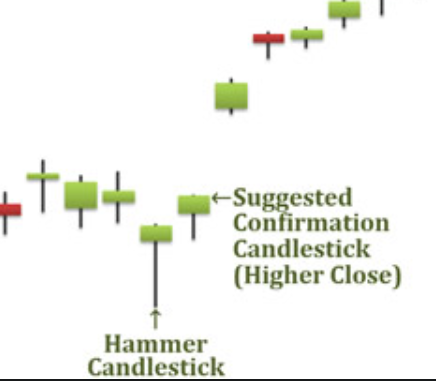

In [ ]:
data = yf.download('HDFC.NS', 
                   start='2010-01-01', 
                   end='2022-01-01',
                   progress=False)
data=data.reset_index()
data['Pre Close']=data['Close'].shift(1)
data['Pre Open']=data['Open'].shift(1)
data['Gap']=['Up' if data['Open'][i] > data['Pre Close'][i] else 'Down' if data['Open'][i] < data['Pre Close'][i] else 'Flat' for i in range(0,len(data))]
data['Color'] = ['Red' if data['Open'][i] > data['Close'][i] else 'Green' if data['Open'][i] < data['Close'][i] else 'Neutral' for i in range(0,len(data))]
data['Downshadow'] = [data['Open'][i] - data['Low'][i] if data['Color'][i] == 'Green' else data['Close'][i] - data['Low'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
data['Upshadow'] = [data['High'][i] - data['Close'][i] if data['Color'][i] == 'Green' else data['High'][i] - data['Open'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
data['Body'] =[abs(data['Close'][i] - data['Open'][i]) for i in range(0,len(data))]
data['Candle']=['Hammer' if data['Downshadow'][i] > 2* data['Body'][i] and data['Downshadow'][i] > 4*data['Upshadow'][i]  and data['Open'][i] < data['Pre Open'][i] and  data['Close'][i] < data['Pre Open'][i] else 'Normal' for i in range(0,len(data))]

time: 565 ms (started: 2021-12-18 14:21:01 +00:00)


Check all hammers 

In [ ]:
df=data[data['Candle']=='Hammer']
import plotly.graph_objects as go
fig = go.Figure(data=go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()
# ZOOM THE CHART WITH OPTION

time: 1.25 s (started: 2021-12-18 14:21:09 +00:00)


The trend over the past 3 trading sessions is downward

In [ ]:
data['Close Diff']=data['Close'].diff()

value=[]
for i in range(0,len(data)):
  try:
    if data['Close Diff'][i-1] < 0 and data['Close Diff'][i-2] < 0 and data['Close Diff'][i-3] < 0:
      value.append('Triple Down')
    else:
      value.append('Normal')
  except:
    value.append('Normal')
    
data['Down Trend']=value

time: 36.5 ms (started: 2021-12-18 14:22:09 +00:00)


Now, Consider only hammers which has last 3 down trend and next candle close higher than hammer's candle close.

In [ ]:
data['Post Close']=data['Close'].shift(-1)

time: 2.64 ms (started: 2021-12-18 14:22:14 +00:00)


I am adding one more condition that the post candle to hammer should open gap up.

In [ ]:
data['Post Gap']=data['Gap'].shift(-1)
data['Post Color']=data['Color'].shift(-1)


time: 4.05 ms (started: 2021-12-18 14:22:18 +00:00)


In [ ]:
hammer=data[data['Candle']=='Hammer']
hammer=hammer[hammer['Down Trend']=='Triple Down']
hammer=hammer[hammer['Post Close'] > hammer['Close']]
hammer=hammer[hammer['Post Gap']=='Up']
hammer=hammer[hammer['Post Color']=='Green']

hammer.reset_index(inplace=True,drop=True)

time: 12.7 ms (started: 2021-12-18 14:22:50 +00:00)


In [ ]:
import plotly.graph_objects as go
df=hammer.copy()
fig = go.Figure(data=go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

time: 196 ms (started: 2021-12-18 14:22:53 +00:00)


Lets check the same date on trading view to confirm the code logic was written as per statement.

Will also check that the hammer set up was able to change the trend or not.

Make Sure to keep Stop Loss. This will protect us from the huge loss.

[TRADING VIEW](https://in.tradingview.com)

# RESULTS
Can Take Intraday benefits or can also hold for week to get more benefit. Suggested 1 week holding.

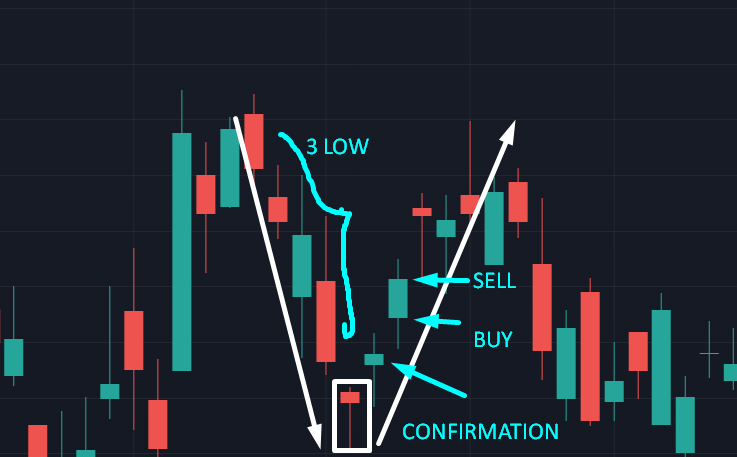

# LETS CREATE A SCANNER WHICH WILL SCAN 135 FNO NSE STOCK

I have a .csv file with 135 FNO Stock ticker naming

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive
time: 27.1 s (started: 2021-12-18 14:23:30 +00:00)


In [ ]:
%cd '/content/gdrive/MyDrive/SASH/'
nse=pd.read_csv('ALL_FNO.csv')

/content/gdrive/MyDrive/SASH
time: 459 ms (started: 2021-12-18 14:24:07 +00:00)


In [ ]:
def scanner(Stock,Start,End):
  data = yf.download(Stock, 
                        start=Start, 
                        end=End,
                        progress=False,
                        interval='15m')
  data=data.reset_index()
  data['Pre Close']=data['Close'].shift(1)
  data['Pre Open']=data['Open'].shift(1)
  data['Gap']=['Up' if data['Open'][i] > data['Pre Close'][i] else 'Down' if data['Open'][i] < data['Pre Close'][i] else 'Flat' for i in range(0,len(data))]
  data['Color'] = ['Red' if data['Open'][i] > data['Close'][i] else 'Green' if data['Open'][i] < data['Close'][i] else 'Neutral' for i in range(0,len(data))]
  data['Downshadow'] = [data['Open'][i] - data['Low'][i] if data['Color'][i] == 'Green' else data['Close'][i] - data['Low'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
  data['Upshadow'] = [data['High'][i] - data['Close'][i] if data['Color'][i] == 'Green' else data['High'][i] - data['Open'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
  data['Body'] =[abs(data['Close'][i] - data['Open'][i]) for i in range(0,len(data))]
  data['Candle']=['Hammer' if data['Downshadow'][i] > 2* data['Body'][i] and data['Downshadow'][i] > 4*data['Upshadow'][i]  and data['Open'][i] < data['Pre Open'][i] and  data['Close'][i] < data['Pre Open'][i] else 'Normal' for i in range(0,len(data))]
  data['Close Diff']=data['Close'].diff()
  data['Close Diff1']=data['Close Diff'].shift(1)
  data['Close Diff2']=data['Close Diff'].shift(2)
  data['Close Diff3']=data['Close Diff'].shift(3)
  data['Down Trend']=['Triple Down' if data['Close Diff1'][i] < 0 and data['Close Diff2'][i] < 0 and data['Close Diff3'][i] < 0 else 'Normal' for i in range(0,len(data))]
  data['Post Close']=data['Close'].shift(-1)
  #add for money calculation
  data['Post Close2']=data['Close'].shift(-2)
  data['Post Open']=data['Open'].shift(-1) 
  data['Post Open2']=data['Open'].shift(-2) 
  # Continue
  data['Post Color']=data['Color'].shift(-1)
  data['Post Gap']=data['Gap'].shift(-1)
  # additional condition, pre greater than 1.3times post
  data['condition']=['Yes' if (abs(data['Pre Open'][i] - data['Pre Close'][i])) > 1.3*(abs(data['Post Close'][i] - data['Post Open'][i])) else 'No' for i in range(0,len(data))]
  hammer=data[data['Candle']=='Hammer']
  hammer=hammer[hammer['Down Trend']=='Triple Down']
  #  slice as per condition pre and post greater than
  hammer=hammer[hammer['condition']=='Yes']
  hammer=hammer[hammer['Post Open2'] > hammer['Post Close']]
  # hash for now
  hammer=hammer[hammer['Post Color']=='Green']
  hammer=hammer[hammer['Post Close'] > hammer['High']]
  hammer=hammer[hammer['Post Gap']=='Up']
  hammer.reset_index(inplace=True,drop=True)
  # hammer['Date']=hammer['Date'].astype('str')
  # added p/l and money
  hammer['P/L']=hammer['Post Close2'] - hammer['Post Open2']
  money=sum(round(100000/hammer['Post Open2']) * hammer['P/L']) - len(hammer) * 85
  trades=len(hammer)
  # return list(hammer['Date'])
  # return list(hammer['Datetime'])
  return list(hammer['Datetime']),int(trades),int(money)

time: 77.6 ms (started: 2021-12-18 14:28:06 +00:00)


In [ ]:
onestock=scanner('HINDALCO.NS', '2021-11-01','2021-12-01')
onestock

([], 0, 0)

time: 217 ms (started: 2021-12-18 14:28:07 +00:00)


In [ ]:
stocks={}
for i in tq.tqdm(nse['Symbol']):
  stocks[i]=scanner(i, '2021-12-01','2021-12-18')
# final=pd.DataFrame()
# final['Stock']=stocks.keys()
# final['Dates']=stocks.values()
# final['Dates']=final['Dates'].astype(str)
# final=final[final['Dates'] != '[]']
# final.reset_index(inplace=True,drop=True)
# print('\n')
# print('Trades:',len(final))
# final
selected_stocks=pd.DataFrame.from_dict(stocks,orient='index',columns=['Dates','Trades','Money'])
selected_stocks=selected_stocks.reset_index()
selected_stocks=selected_stocks.rename(columns={'index':'Stock'})
print('\n')
print('Money:',sum(selected_stocks['Money']))
print('Trades:',sum(selected_stocks['Trades']))
selected_stocks=selected_stocks[selected_stocks['Trades'] != 0]
selected_stocks

  0%|          | 0/137 [00:00<?, ?it/s]



Money: -667
Trades: 4


,Stock,Dates,Trades,Money
34,HEROMOTOCO.NS,[2021-12-10 14:45:00+05:30],1,-205
51,MARUTI.NS,[2021-12-14 13:15:00+05:30],1,-423
130,MFSL.NS,[2021-12-15 10:15:00+05:30],1,86
135,SRF.NS,[2021-12-03 12:45:00+05:30],1,-125


time: 29.2 s (started: 2021-12-18 14:32:38 +00:00)


# SKIP

In [ ]:
# Calculations={}
# stocks={}
# for j in range(2010,2022):
#   for i in tqdm(nse['Symbol']):
#     stocks[i]=scanner(i, str(j) + '-01-01', str(j+1) + '-01-01')
#   selected_stocks=pd.DataFrame.from_dict(stocks,orient='index',columns=['Dates','Trades','Money'])
#   selected_stocks=selected_stocks.reset_index()
#   selected_stocks=selected_stocks.rename(columns={'index':'Stock'})
#   # print('\n')
#   # print('Money:',sum(selected_stocks['Money']))
#   # print('Trades:',sum(selected_stocks['Trades']))
#   Calculations[str(j) + '-01-01' +' to '+ str(j+1) + '-01-01']=(sum(selected_stocks['Money']),sum(selected_stocks['Trades']))
# Calculations

# selected_stocks=pd.DataFrame.from_dict(stocks,orient='index',columns=['Dates','Trades','Money'])
# selected_stocks=selected_stocks.reset_index()
# selected_stocks=selected_stocks.rename(columns={'index':'Stock'})
# print('\n')
# print('Money:',sum(selected_stocks['Money']))
# print('Trades:',sum(selected_stocks['Trades']))
# selected_stocks=selected_stocks[selected_stocks['Trades'] != 0]
# selected_stocks


time: 7.34 ms (started: 2021-05-14 07:57:34 +00:00)


In [ ]:
print('total dates:',len(set(final['Dates'])))

total dates: 12
time: 1.59 ms (started: 2021-05-14 07:46:19 +00:00)


In [ ]:
# final.to_csv('all_hammer_setup_2021.csv')

time: 10.4 ms (started: 2021-05-13 14:40:06 +00:00)


In [ ]:
# files.download('all_hammer_setup_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 13.4 ms (started: 2021-05-13 14:40:12 +00:00)


In [ ]:
data = yf.download('HDFCBANK.NS', 
                      start='2020-01-01', 
                      end='2021-01-01',
                      progress=False)
data=data.reset_index()
data['Pre Close']=data['Close'].shift(1)
data['Pre Open']=data['Close'].shift(1)
data['Gap']=['Up' if data['Open'][i] > data['Pre Close'][i] else 'Down' if data['Open'][i] < data['Pre Close'][i] else 'Flat' for i in range(0,len(data))]
data['Color'] = ['Red' if data['Open'][i] > data['Close'][i] else 'Green' if data['Open'][i] < data['Close'][i] else 'Neutral' for i in range(0,len(data))]
data['Downshadow'] = [data['Open'][i] - data['Low'][i] if data['Color'][i] == 'Green' else data['Close'][i] - data['Low'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
data['Upshadow'] = [data['High'][i] - data['Close'][i] if data['Color'][i] == 'Green' else data['High'][i] - data['Open'][i] if data['Color'][i] == 'Red' else 0 for i in range(0,len(data))]
data['Body'] =[abs(data['Close'][i] - data['Open'][i]) for i in range(0,len(data))]
data['Candle']=['Hammer' if data['Downshadow'][i] > 2* data['Body'][i] and data['Downshadow'][i] > 4*data['Upshadow'][i]  and data['Open'][i] < data['Pre Open'][i] and  data['Close'][i] < data['Pre Open'][i] else 'Normal' for i in range(0,len(data))]
data['Close Diff']=data['Close'].diff()
data['Close Diff1']=data['Close Diff'].shift(1)
data['Close Diff2']=data['Close Diff'].shift(2)
data['Close Diff3']=data['Close Diff'].shift(3)
data['Down Trend']=['Triple Down' if data['Close Diff1'][i] < 0 and data['Close Diff2'][i] < 0 and data['Close Diff3'][i] < 0 else 'Normal' for i in range(0,len(data))]
data['Post Close']=data['Close'].shift(-1)
data['Post Color']=data['Color'].shift(-1)
data['Post Gap']=data['Gap'].shift(-1)
hammer=data[data['Candle']=='Hammer']
hammer=hammer[hammer['Down Trend']=='Triple Down']
hammer=hammer[hammer['Post Color']=='Green']
hammer=hammer[hammer['Post Close'] >= hammer['High']]
hammer=hammer[hammer['Post Gap']=='Up']
hammer.reset_index(inplace=True,drop=True)
hammer['Date']=hammer['Date'].astype('str')
hammer

,Date,Open,High,Low,Close,Adj Close,Volume,Pre Close,Pre Open,Gap,Color,Downshadow,Upshadow,Body,Candle,Close Diff,Close Diff1,Close Diff2,Close Diff3,Down Trend,Post Close,Post Color,Post Gap,Post Gap2
0,2020-02-18,1216.900024,1218.5,1203.5,1213.25,1213.25,5264558,1217.150024,1217.150024,Down,Red,9.75,1.599976,3.650024,Hammer,-3.900024,-2.199951,-22.050049,-7.599976,Triple Down,1227.199951,Green,Up,Up


time: 246 ms (started: 2021-05-13 15:10:47 +00:00)


In [ ]:
import plotly.graph_objects as go
df=hammer.copy()
fig = go.Figure(data=go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

time: 133 ms (started: 2021-05-13 15:09:22 +00:00)


# Similarly, lets do the same for all NSE stocks about 1350

In [ ]:
NSE=pd.read_excel('/content/gdrive/MyDrive/SASH/Trading_NSE.xlsx')
NSE.head(1)

,Ticker,Name,Category Name,LINK,New Signal (3M),signal (1YR),PCT (3M),2021-03-12 00:00:00,2021-01-15 00:00:00,2020-10-01 00:00:00,2020-07-01 00:00:00,2020-04-01 00:00:00,2020-01-01 00:00:00,2019-10-01 00:00:00,2019-07-01 00:00:00,2019-04-01 00:00:00,2019-01-01 00:00:00,2018-10-01 00:00:00,2018-07-01 00:00:00,2018-04-01 00:00:00,2018-01-01 00:00:00,INACTIVE LINKS
0,BHARTIARTL.NS,Bharti Airtel Limited,Wireless Communications,https://in.finance.yahoo.com/quote/BHARTIARTL.NS,Bear,Bear,-13.017508,524.200012,602.650024,509.700012,420.950012,559.849976,440.899994,455.799988,367.049988,346.649994,305.845215,286.930725,310.849274,350.698242,366.077728,https://in.finance.yahoo.com/quote/BHARTIARTL.NS


time: 298 ms (started: 2021-05-15 05:06:49 +00:00)


In [ ]:
stocks={}
for i in tq.tqdm(NSE['Ticker']):
  try:
    stocks[i]=scanner(i, '2021-03-20','2021-05-30')
  except:
    pass
# final=pd.DataFrame()
# final['Stock']=stocks.keys()
# final['Dates']=stocks.values()
# final['Dates']=final['Dates'].astype(str)
# final=final[final['Dates'] != '[]']
# final.reset_index(inplace=True,drop=True)
# print('Trades:',len(final))
# final
selected_stocks=pd.DataFrame.from_dict(stocks,orient='index',columns=['Dates','Trades','Money'])
selected_stocks=selected_stocks.reset_index()
selected_stocks=selected_stocks.rename(columns={'index':'Stock'})
print('\n')
print('Money:',sum(selected_stocks['Money']))
print('Trades:',sum(selected_stocks['Trades']))
selected_stocks=selected_stocks[selected_stocks['Trades'] != 0]
selected_stocks


1 Failed download:
- SITASHREE.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- JUBILANT.NS: No data found, symbol may be delisted

1 Failed download:
- JAIHINDPRO.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- KSK.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- SUJANAUNI.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- XLENERGY.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- WINSOME.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- JVLAGRO.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- AIFL.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- METKORE.NS: No data found for this date range, symbol may be delisted

1 Failed download:
- ESSDEE.NS: No data found for this date range, symbol may be delisted

1 Fail

,Stock,Dates,Trades,Money
29,ADANIPORTS.NS,[2021-05-11 13:15:00+05:30],1,104
34,MUTHOOTFIN.NS,[2021-05-11 13:45:00+05:30],1,201
85,KITEX.NS,[2021-03-24 10:30:00+05:30],1,-228
93,MRF.NS,[2021-04-12 12:00:00+05:30],1,81
97,ICIL.NS,[2021-04-05 11:00:00+05:30],1,-85
...,...,...,...,...
1153,SWANENERGY.NS,[2021-03-25 10:45:00+05:30],1,-903
1154,SWELECTES.NS,[2021-04-15 10:30:00+05:30],1,-33
1163,TATACOFFEE.NS,[2021-05-11 13:15:00+05:30],1,144
1199,WALCHANNAG.NS,[2021-04-07 15:15:00+05:30],1,229


time: 27min 26s (started: 2021-05-15 05:35:28 +00:00)


In [ ]:
print(len(set(final['Dates'])))

65
time: 1.61 ms (started: 2021-05-14 17:38:48 +00:00)


In [ ]:
final.to_csv('all15mindates.csv')

time: 15.9 ms (started: 2021-05-14 17:39:43 +00:00)


In [ ]:
files.download('all15mindates.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 10.2 ms (started: 2021-05-14 17:41:02 +00:00)


In [ ]:
# stocks={}
# for i in tqdm(NSE['Ticker']):
#   stocks[i]=scanner(i, '2010-01-01','2022-01-01')
# selected_stocks=pd.DataFrame.from_dict(stocks,orient='index',columns=['Dates','Trades','Money'])
# selected_stocks=selected_stocks.reset_index()
# selected_stocks=selected_stocks.rename(columns={'index':'Stock'})
# print('\n')
# print('Money:',sum(selected_stocks['Money']))
# print('Trades:',sum(selected_stocks['Trades']))
# selected_stocks=selected_stocks[selected_stocks['Trades'] != 0]
# selected_stocks

In [ ]:
print(len(set(final['Dates'])))

13
time: 1.03 ms (started: 2021-05-13 15:39:32 +00:00)
